# Semantic Segmentation Lab

Jun Zhu
----

In this notebook, we will build a segmentation network to track VIP in an image. We use the data set for one of the projects at RoboND, Udacity. However, we have implemented different models. One is the original [SegNet](https://arxiv.org/pdf/1511.00561.pdf) and the other has a similar structure but all the convolutional layers are replaced by [depthwise separable convolutional layers](https://arxiv.org/pdf/1610.02357.pdf). However, due to technical constraint, **we have not combined the pooling indices in the encoder to the decoder!!!**

In [1]:
import os
import glob
import sys
import imageio
import random

import numpy as np
import cv2

import tensorflow as tf
import keras

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import helper
import depthwise_segnet
import segnet

print("Tensorflow version: {}".format(tf.__version__))
print("Keras version: {}".format(keras.__version__))

/home/ubuntu/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Tensorflow version: 1.4.0
Keras version: 2.1.1


Using TensorFlow backend.


## Data Collection<a id='data'></a>
Download the [training](https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/train.zip) and [validation](https://s3-us-west-1.amazonaws.com/udacity-robotics/Deep+Learning+Data/Lab/validation.zip) data for the RoboND at Udacity. Then put the respective folders in the `/data` directory.

In [2]:
helper.maybe_download_data()

## Data Visualization<a id='data_vis'></a>

In [3]:
train_data_folder = 'data/train'
vali_data_folder = 'data/validation'
test_data_folder = 'data/test'

# sort the data to match the image and the mask
train_images = sorted(glob.glob(os.path.join(train_data_folder, 'images', '*.jpeg')))
train_masks = sorted(glob.glob(os.path.join(train_data_folder, 'masks', '*.png')))
vali_images = sorted(glob.glob(os.path.join(vali_data_folder, 'images', '*.jpeg')))
vali_masks = sorted(glob.glob(os.path.join(vali_data_folder, 'masks', '*.png')))
test_images = sorted(glob.glob(os.path.join(test_data_folder, 'images', '*.jpeg')))
test_masks = sorted(glob.glob(os.path.join(test_data_folder, 'masks', '*.png')))

num_train_data = len(train_images)
num_vali_data = len(vali_images)
num_test_data = len(test_images)
assert(num_train_data == 4131)
assert(num_vali_data == 584)
assert(num_test_data == 600)

### Visualize the training data.

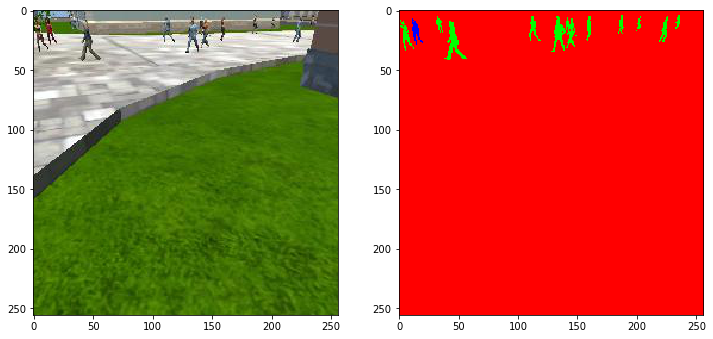

In [4]:
# idx = random.choice(range(len(train_images)))
idx = 1000

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(imageio.imread(train_images[idx]))
ax[1].imshow(imageio.imread(train_masks[idx]))

### Visualize the validation data.

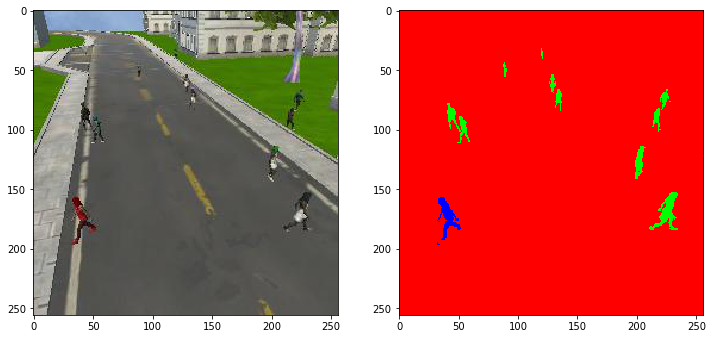

In [5]:
# idx = random.choice(range(len(vali_images)))
idx = 150

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(imageio.imread(vali_images[idx]))
ax[1].imshow(imageio.imread(vali_masks[idx]))

## Build models<a id='model'></a>

In [6]:
image_shape = (256, 256, 3)
num_classes = 3
class_colors = ((0, 0, 255), (0, 255, 0), (255, 0, 0))
assert(num_classes == len(class_colors))
learning_rate = 2e-4
batch_size = 16
epochs = 30

## Train

### Depthwise segnet

In [7]:
saved_model = "saved_depthwise_segnet.h5"
output_folder = "output"

model = depthwise_segnet.build_model(image_shape, num_classes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 128, 128, 3)       0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 128, 128, 32)      155       
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 128, 128, 32)      1344      
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)      128       
__________

In [8]:
try:
    model.load_weights(saved_model)
    print("\nLoaded existing weights!")    
except:
    pass
# helper.train(model, epochs, batch_size, learning_rate, class_colors,
#              train_data_folder, num_train_data, vali_data_folder, num_vali_data)
# model.save(saved_model)


Loaded existing weights!


In [9]:
# helper.output_prediction(model, image_shape, class_colors, batch_size, test_data_folder, output_folder)

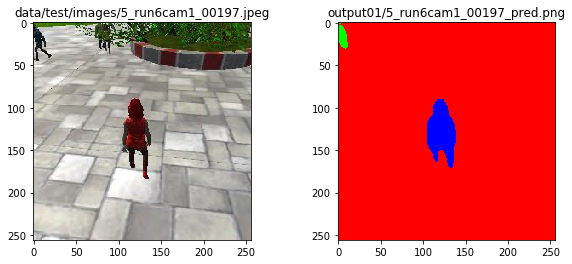

In [20]:
preds = sorted(glob.glob(os.path.join(output_folder, "*.png")))
idx = random.randint(0, len(preds))
pred_img = imageio.imread(preds[idx])
test_img = imageio.imread(test_images[idx])

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(test_img)
ax[0].set_title(test_images[idx])
ax[1].imshow(pred_img)
ax[1].set_title(preds[idx])

### Segnet

In [11]:
saved_model = "saved_segnet.h5"
output_folder = "output01"

model = segnet.build_model(image_shape, num_classes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
batch_normalization_27 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
activation_28 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_28 (Batc (None, 128, 128, 32)      128       
__________

In [12]:
try:
    model.load_weights(saved_model)
    print("\nLoaded existing weights!")
except:
    pass
# helper.train(model, epochs, batch_size, learning_rate, class_colors,
#              train_data_folder, num_train_data, vali_data_folder, num_vali_data)
# model.save(saved_model)


Loaded existing weights!


In [13]:
# helper.output_prediction(model, image_shape, class_colors, batch_size, test_data_folder, output_folder)

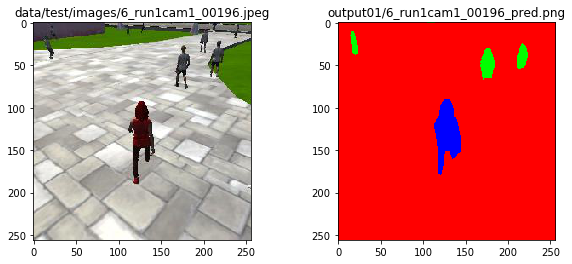

In [14]:
preds = sorted(glob.glob(os.path.join(output_folder, "*.png")))
idx = random.randint(0, len(preds))
pred_img = imageio.imread(preds[idx])
test_img = imageio.imread(test_images[idx])

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(test_img)
ax[0].set_title(test_images[idx])
ax[1].imshow(pred_img)
ax[1].set_title(preds[idx])